<a href="https://colab.research.google.com/github/IntroComputationalPhysics-UNT/euler-and-solve-ivp-GavinDunaway410/blob/main/rigid_pendulum_assignment_completeish.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Plotting solutions to the rigid pendulum problem

In this assignment, we explore the solution to the undriven rigid pendulum using: the Euler code we wrote in class, and the `scipy.integrate` package.

In this assignemnt, please use $\omega_0 = 1$ and $I=1$, and $0\le t \le 100$.

----

**Additional information:**

We will use two different initial conditions:
* $\theta = \pi$ and $\frac{d\theta}{dt} = 0$, and
* $\theta = 0$ and $\frac{d\theta}{dt} = 2$.

**Temporal evolution of $\theta$:** for plots of $\theta$ versus $t$, include the following plotting options:
* `plt.figure(figsize=(10,2))`
* `plt.xlim([0, 100]) # time`
* `plt.ylim([- 5 * np.pi - 0.5, 5 * np.pi + 0.5]) # theta`
* Add axes labels and a legend

**Phase portraits:** for plots of $d\theta/dt$ versus $\theta$, include the following plotting options:
* `plt.figure(figsize=(12,3))`
* `plt.xlim([- 5 * np.pi - 0.5, 5 * np.pi + 0.5]) # theta`
* `plt.ylim([-  np.pi - 0.5,  np.pi + 0.5]) # angular velocity`
* Add axes labels and a legend

**Constant energy curves:** for contour plots of the energy, include the following plotting options:
* `plt.figure(figsize=(11,3))`
* `plt.xlim([- 5 * np.pi - 0.5, 5 * np.pi + 0.5]) # theta`
* `plt.ylim([-  np.pi - 0.5,  np.pi + 0.5]) # angular velocity`
* Add axes labels and a legend


## **Problem 1:**

Apply the Euler code we wrote in class to the rigid pendulum defined by $\ddot{\theta} + \omega_0^2 sin(\theta)=0$.

1. **[Text cell]:** Create a text cell with organized pseudocode.
2. **[Code cell(s)]:** For `theta_0 = math.pi`, and `ang_vel_0 = 0`, plot the temporal evolution of $\theta$.
3. **[Code cell(s)]:** For `theta_0 = 0`, and `ang_vel_0 = 2`, plot the temporal evolution of $\theta$ **_and_** the phase portrait.
4. **[Text cell]:** You will need to compare the simple Euler and symplectic/semi-implicit Euler methods and adjust mesh density to find sensible results. Explain your choice.

In [2]:
# problem 1

**Pseudocode**
1. Import modules
2. Define the function for respective parameters, then...
3. ... Define the parameters
4. Plot results


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [4]:
# Define euler method for a simple harmonic oscillator
def euler_sho(omega_0, theta_0, ang_vel_0, t_0, t_f, n_steps):
  """
  This function calculates the solution to theta'' = - omega_0 ^2 theta with Euler's method.
  """
  dt = (t_f - t_0) / n_steps # calculate dt
  theta = [theta_0] # initialized theta list
  ang_vel = [ang_vel_0] # initialized ang_vel list
  t = [t_0] # initialized t list
  for _ in range(n_steps):
    theta_new = theta[-1] + ang_vel[-1] * dt # update theta
    ang_vel_new = ang_vel[-1] - omega_0 ** 2 * theta_new * dt
    t_new = t[-1] + dt # update t
    theta.append(theta_new) # append theta
    ang_vel.append(ang_vel_new) # append ang_vel
    t.append(t_new) # append t
  return t, theta, ang_vel

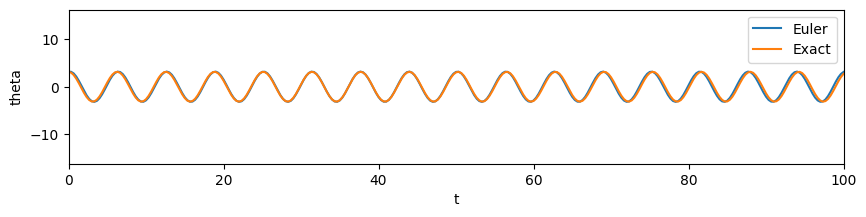

solution using Euler's method
         t      theta theta_exact theta_error
  0.000000   3.141593   3.141593   0.000000
  0.333333   3.141593   2.968670   0.172923
  0.666667   2.792527   2.468938   0.323589
  1.000000   2.133180   1.697410   0.435770
  1.333333   1.236814   0.739021   0.497793
  1.666667   0.203023  -0.300724   0.503748
  2.000000  -0.853325  -1.307364   0.454039
  2.333333  -1.814860  -2.170081   0.355221
  2.666667  -2.574743  -2.793902   0.219158
  3.000000  -3.048544  -3.110153   0.061609
  3.333333  -3.183618  -3.084020  -0.099598
  3.666667  -2.964956  -2.718379  -0.246578
  4.000000  -2.416855  -2.053482  -0.363373
  4.333333  -1.600215  -1.162525  -0.437689
  4.666667  -0.605772  -0.143591  -0.462181
  5.000000   0.455978   0.891151  -0.435173
  5.333333   1.467064   1.827790  -0.360725
  5.666667   2.315143   2.563214  -0.248071
  6.000000   2.905984   3.016464  -0.110480
  6.333333   3.173938   3.137643   0.036294
  6.666667   3.089232   2.913412   0.175820


In [5]:
# Temporal evolution of theta for initial conditions set 1:

# Assign variables & call function
theta_0 = math.pi
ang_vel_0 = 0
omega_0 = 1
t_0 = 0
t_f = 100
n_steps = 300

t, theta, ang_vel = euler_sho(omega_0, theta_0, ang_vel_0, t_0, t_f, n_steps)

# Get the exact values
theta_exact_sho = [theta_0 * math.cos(omega_0 * (t[i] - t_0)) + (ang_vel_0 / omega_0) * math.sin(omega_0 * (t[i] - t_0)) for i in range(len(t))]
theta_error = [theta[i] - theta_exact_sho[i] for i in range(len(theta))]

# Plot motion
plt.figure(figsize=(10,2))
plt.xlim([0, 100])
plt.ylim([- 5 * np.pi - 0.5, 5 * np.pi + 0.5])
plt.plot(t, theta, label='Euler')
plt.plot(t, theta_exact_sho,label='Exact')
plt.xlabel('t')
plt.ylabel('theta')
plt.legend()
plt.show()

print('solution using Euler\'s method')
print(f"{'t':>10s} {'theta':>10s} {'theta_exact':>10s} {'theta_error':>10s}")
for i in range(len(theta)):
  print(f"{t[i]:>10.6f} {theta[i]:>10.6f} {theta_exact_sho[i]:>10.6f} {theta_error[i]:>10.6f}")


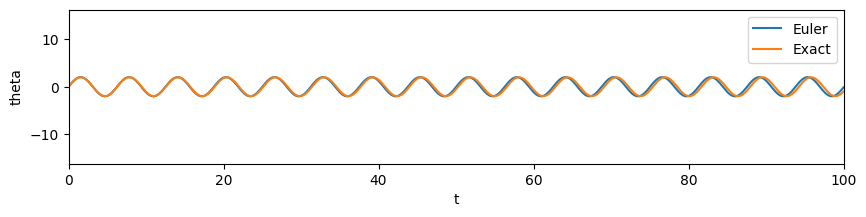

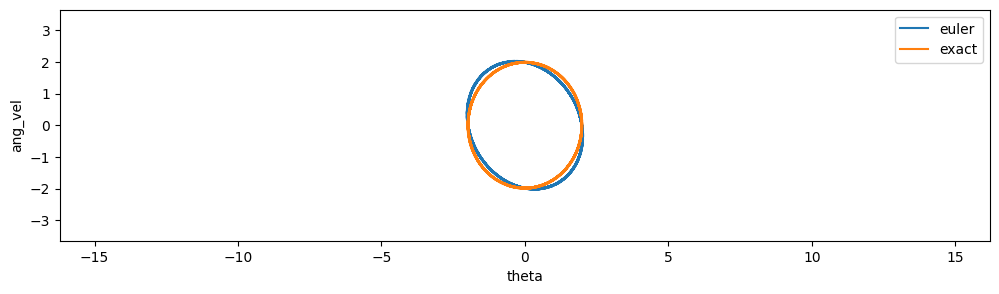

solution using Euler's method
         t      theta theta_exact theta_error
  0.000000   0.000000   0.000000   0.000000
  0.333333   0.666667   0.654389   0.012277
  0.666667   1.259259   1.236740   0.022520
  1.000000   1.711934   1.682942   0.028992
  1.333333   1.974394   1.943876   0.030518
  1.666667   2.017477   1.990816   0.026661
  2.000000   1.836396   1.818595   0.017801
  2.333333   1.451271   1.446172   0.005099
  2.666667   0.904893   0.914545  -0.009652
  3.000000   0.257972   0.282240  -0.024268
  3.333333  -0.417613  -0.381136  -0.036477
  3.666667  -1.046796  -1.002554  -0.044242
  4.000000  -1.559669  -1.513605  -0.046064
  4.333333  -1.899245  -1.858029  -0.041216
  4.666667  -2.027794  -1.997910  -0.029884
  5.000000  -1.931032  -1.917849  -0.013184
  5.333333  -1.619711  -1.626659   0.006947
  5.666667  -1.128423  -1.156396   0.027974
  6.000000  -0.511754  -0.558831   0.047077
  6.333333   0.161777   0.100254   0.061523
  6.666667   0.817332   0.748302   0.069029


In [6]:
# Temporal evolution of theta for initial conditions set 2:

# Assign variables & call function
theta_0 = 0
ang_vel_0 = 2
omega_0 = 1
t_0 = 0
t_f = 100
n_steps = 300

t, theta, ang_vel = euler_sho(omega_0, theta_0, ang_vel_0, t_0, t_f, n_steps)

# Get the exact values
theta_exact_sho = [theta_0 * math.cos(omega_0 * (t[i] - t_0)) + (ang_vel_0 / omega_0) * math.sin(omega_0 * (t[i] - t_0)) for i in range(len(t))]
theta_error = [theta[i] - theta_exact_sho[i] for i in range(len(theta))]
ang_vel_exact_sho = [- theta_0 * omega_0 * math.sin(omega_0 * (t[i] - t_0)) + ang_vel_0 * math.cos(omega_0 * (t[i] - t_0)) for i in range(len(t))]

# Plot motion
plt.figure(figsize=(10,2))
plt.xlim([0, 100])
plt.ylim([- 5 * np.pi - 0.5, 5 * np.pi + 0.5])
plt.plot(t, theta, label='Euler')
plt.plot(t, theta_exact_sho,label='Exact')
plt.xlabel('t')
plt.ylabel('theta')
plt.legend()
plt.show()

# Plot Phase Portrait
plt.figure(figsize=(12,3))
plt.xlim([- 5 * np.pi - 0.5, 5 * np.pi + 0.5])
plt.ylim([-  np.pi - 0.5,  np.pi + 0.5])
plt.plot(theta, ang_vel, label='euler')
plt.plot(theta_exact_sho, ang_vel_exact_sho,label='exact')
plt.xlabel('theta')
plt.ylabel('ang_vel')
plt.legend()
plt.show()

print('solution using Euler\'s method')
print(f"{'t':>10s} {'theta':>10s} {'theta_exact':>10s} {'theta_error':>10s}")
for i in range(len(theta)):
  print(f"{t[i]:>10.6f} {theta[i]:>10.6f} {theta_exact_sho[i]:>10.6f} {theta_error[i]:>10.6f}")

The $\theta$ value for the Euler approximation is only slightly different than the exactly calculated value, with the accuracy increasing as the desity of points increases, and the difference between the two generally increases as time progresses, with the exact values beginning to shift forward (to the right).

## **Problem 2:**

Use `scipy.integrate` and `solve_ivp` to solve the same problem. You'll need to settle on a solver and on tolerances to get physically meaningful results.

1. **[Text cell]:** Include a text cell with organized pseudocode.
2. **[Code cell(s)]:** For `theta_0 = math.pi`, and `ang_vel_0 = 0`, plot the temporal evolution of $\theta$.
3. **[Code cell(s)]:** For `theta_0 = 0`, and `ang_vel_0 = 2`, plot the temporal evolution of $\theta$ **_and_** the phase portrait.
4. **[Text cell]:** You will need to choose a solver and tolerances to see sensible results. Use `help(solve_ivp)` or `solve_ivp?` to explore these options. Explain your choice.



**Pseudocode**
1. Import Modules
2. Define the Function
3. Establish initial conditions, parameters, and arguments (for solve_ivp function)
4. Run solver using established preliminaries and initialize list for graphing
5. Graph temporal evolution and phase portrait (for part 2)

**Part 1**

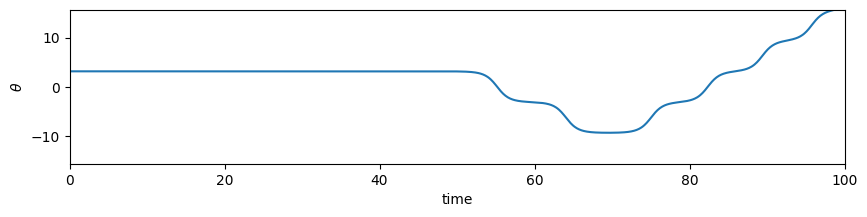

In [7]:
# Parameter Set 1

# Import Modules

import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define the Differential Equation

def rigid_pendulum_ode(t, y, omega_0=1):
 """
 Returns the time derivative of y=[theta, ang_vel] (the angle and angular velocity).
 """
 theta, ang_vel = y
 dtheta_dt = ang_vel
 d2theta_dt2 = - omega_0 ** 2 * np.sin(theta)
 dy_dt = [dtheta_dt, d2theta_dt2]
 return dy_dt

# Define the initial conditions, input parameters, and the time span

# initial conditions
theta_0 = np.pi
ang_vel_0 = 0
y_0 = [theta_0, ang_vel_0]

# input parameters
omega_0 = 1

# time span
t_initial = 0 # initial time
t_final = 100 # final time
t_span = [t_initial, t_final] # time span

# solve differential equation
solution = solve_ivp(rigid_pendulum_ode,
 t_span, # time span to solve over
 y_0, # initial conditions
 args=(omega_0,), # passes `omega_0` to `rigid_pendulum_ode`
 dense_output=True # returns an interpolated solution
 )

# create list for plotting our solution
n_steps = 1000 # number of time steps
t_plot = np.linspace(t_initial, t_final, n_steps) # list of times for plotting
theta_plot = solution.sol(t_plot)[0] # evaluate the interpolant on a mesh for plotting
ang_vel_plot = solution.sol(t_plot)[1] # evaluate the interpolant on a mesh for plotting

# plot the temporal evolution
plt.figure(figsize=(10,2))
plt.plot(t_plot, theta_plot)
plt.xlabel("time")
plt.ylabel("$\\theta$")
plt.xlim([0, 100])
plt.ylim(- 5 * np.pi, 5 * np.pi)
plt.show()


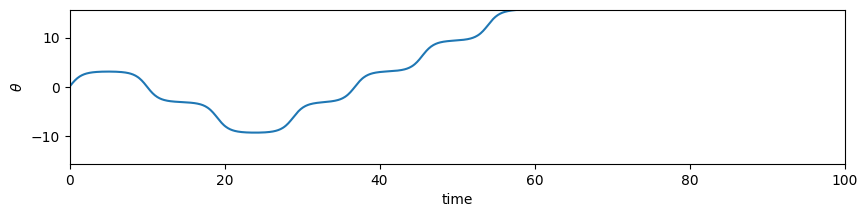

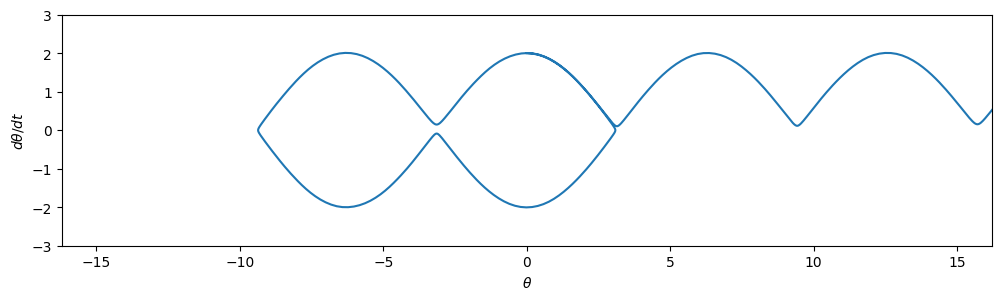

In [8]:
# Parameter Set 2

# Import Modules

import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define the Differential Equation

def rigid_pendulum_ode(t, y, omega_0=1):
 """
 Returns the time derivative of y=[theta, ang_vel] (the angle and angular velocity).
 """
 theta, ang_vel = y
 dtheta_dt = ang_vel
 d2theta_dt2 = - omega_0 ** 2 * np.sin(theta)
 dy_dt = [dtheta_dt, d2theta_dt2]
 return dy_dt

# Define the initial conditions, input parameters, and the time span

# initial conditions
theta_0 = 0
ang_vel_0 = 2
y_0 = [theta_0, ang_vel_0]

# input parameters
omega_0 = 1

# time span
t_initial = 0 # initial time
t_final = 100 # final time
t_span = [t_initial, t_final] # time span

# solve differential equation
solution = solve_ivp(rigid_pendulum_ode,
 t_span, # time span to solve over
 y_0, # initial conditions
 args=(omega_0,), # passes `omega_0` to `rigid_pendulum_ode`
 dense_output=True # returns an interpolated solution
 )

# create list for plotting our solution
n_steps = 1000 # number of time steps
t_plot = np.linspace(t_initial, t_final, n_steps) # list of times for plotting
theta_plot = solution.sol(t_plot)[0] # evaluate the interpolant on a mesh for plotting
ang_vel_plot = solution.sol(t_plot)[1] # evaluate the interpolant on a mesh for plotting

# plot the temporal evolution
plt.figure(figsize=(10,2))
plt.plot(t_plot, theta_plot)
plt.xlabel("time")
plt.ylabel("$\\theta$")
plt.xlim([0, 100])
plt.ylim(- 5 * np.pi, 5 * np.pi)
plt.show()

# plot the phase portrait
plt.figure(figsize=(12,3))
plt.plot(theta_plot, ang_vel_plot)
plt.xlabel("$\\theta$")
plt.ylabel("$d\\theta/dt$")
plt.xlim([-5 * np.pi - 0.5, 5 * np.pi + 0.5])
plt.ylim(-3, 3)
plt.show()

The solver used was the same solve laid out in the in-class notes, but the solver seems to be understanding the angle as being from a vertical position, that is, that a displacement of $\theta$ is directly upwards, as opposed to the Euler solver, which percieved the same angular displacement as being 180 degrees to the left.

## **Problem 3:**

Debug and edit the code cell included below to plot the phase portrait on constant energy curves.

1. **[Code cell(s)]:** Debug the code cell below. Incorporate the details from the **_Constant energy curves_** item in the introduction. Add a comment at the end of each line explaining what that line does.
2. **[Code cell(s)]:** Combine the energy contours with your `theta_0 = 0`; `ang_vel_0=2` solution.
3. **[Text cell]:** Comment on the result.


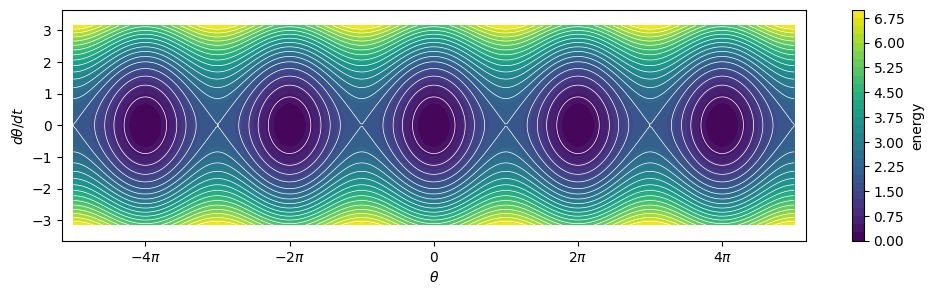

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def rigid_pendulum_energy(theta, ang_vel, omega_0=1, moment_of_inertia=1):
  energy = 0.5 * moment_of_inertia * ang_vel ** 2 + moment_of_inertia * omega_0 ** 2 * (1-np.cos(theta))
  return energy

theta_list = np.linspace(-5 * np.pi, 5 * np.pi, 300)
ang_vel_list = np.linspace(- np.pi,  np.pi, 100)
theta_mesh, ang_vel_mesh = np.meshgrid(theta_list, ang_vel_list)
energy_mesh = rigid_pendulum_energy(theta_mesh, ang_vel_mesh)
low_levels = np.linspace(0, 2, 5, endpoint=False)
high_levels = np.linspace(2, energy_mesh.max(), 15)
levels = np.concatenate((low_levels, high_levels))

x_lim = [-5 * np.pi - 0.5, 5 * np.pi + 0.5]
y_lim = [- np.pi - 0.5, np.pi + 0.5]
x_ticks = [-4*np.pi, -2*np.pi, 0, 2*np.pi, 4*np.pi]
x_tick_labels = ['$-4\\pi$', '$-2\\pi$', '$0$', '$2\\pi$', '$4\\pi$']
plt.figure(figsize=[12, 3])
contours = plt.contourf(theta_mesh, ang_vel_mesh, energy_mesh, levels=30, cmap='viridis')
plt.contour(theta_mesh, ang_vel_mesh, energy_mesh, levels=levels, colors='white', linewidths=0.5)
plt.plot(theta_plot[0], ang_vel_plot[1], label='rigid pendulum', color='red', linewidth=0.5)
plt.colorbar(contours, label='energy')
plt.xlabel('$\\theta$')
plt.ylabel('$d\\theta/dt$')
plt.xticks(x_ticks, x_tick_labels)
plt.yticks(range(-3,4,1))
plt.xlim(x_lim)
plt.ylim(y_lim)
plt.show()

The graph displays a gradient of colors representing the energy of the system over a mesh of both the angle and angular velocity. At varying intervals of the angle, the energy decreases, with the minimums being where the angle is a multiple of 2$\pi$ and the angular velocity is zero, which should be expected, as the minimum amount of energy should be expected where there is zero veolicy.

I had everything set up the way it needed to be before, but colab suddenly began giving me an error message saying that xlim was being defined as a list for every instance it appeared in the code, and I can't get it to go back to normal, but I was able to revert to a previous version of the code I had written. This one isn't as complete, but I unfortunately deleted the other by accident and don't remember how to complete it.